In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string

import nltk
from nltk import Text
from nltk.tokenize import word_tokenize  
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
nltk.download('stopwords')
stopword = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df = pd.read_csv('drive/My Drive/NLP/spam.csv', encoding='latin-1')

In [78]:
df

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
text          5572 non-null object
label         5572 non-null object
clean_text    5572 non-null object
dtypes: object(3)
memory usage: 130.7+ KB


In [0]:
df['text'] = df['text'].str.lower()

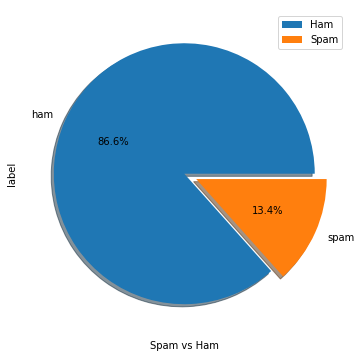

In [41]:
df["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.xlabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [0]:
di = {'ham': 0, 'spam' : 1 }
df.label = df['label'].map(di)

In [0]:
# df['text'] = df['text'].str.replace('[{}]'.format(string.punctuation), '')
# df['split_text'] = df['text'].apply(nltk.word_tokenize)

In [0]:
ps = nltk.PorterStemmer()


In [0]:
def clean_text(text):
    remove_punct = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',remove_punct)
    noStop = ([ps.stem(word) for word in tokens if word not in stopword])
    return noStop

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_Vector = TfidfVectorizer(analyzer= clean_text)
Xtfidf_Vector = tfidf_Vector.fit_transform(df['text'])

In [0]:
df['length'] = df['text'].apply(len)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


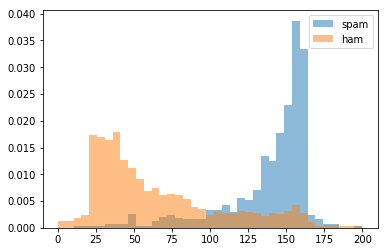

<Figure size 1e+06x400000 with 0 Axes>

In [113]:
bins = np.linspace(0,200,40)
plt.hist(df[df['label'] == 1]['length'],bins,alpha = 0.5,normed = True,label = 'spam')
plt.hist(df[df['label'] == 0]['length'],bins,alpha = 0.5,normed = True, label = 'ham')
plt.legend(loc = 'upper right')
plt.figure(figsize = (1000,400), dpi = 1000)
plt.show()